In [2]:
from sqlalchemy import create_engine
import pandas as pd
from config import username, password,hostname

path = "Employees_SQL"

engine = create_engine('postgresql://postgres:'+ password+'@localhost:5432/'+path)

connection = engine.connect()


In [3]:
employees = pd.read_sql("select * from employees",connection)


salaries = pd.read_sql("select * from salaries",connection)

titles = pd.read_sql("select * from titles",connection)


In [4]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [5]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [6]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [7]:
emp_sal = employees.merge(salaries, how = 'inner', on = 'emp_no')
emp_sal_title = emp_sal.merge(titles,how = 'inner',on= 'emp_no')
emp_sal_title.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [8]:
hw = emp_sal_title[['emp_no','first_name','last_name','salary','title']]
hw.head()

,emp_no,first_name,last_name,salary,title
0,10001,Georgi,Facello,60117,Senior Engineer
1,10002,Bezalel,Simmel,65828,Staff
2,10003,Parto,Bamford,40006,Senior Engineer
3,10004,Chirstian,Koblick,40054,Engineer
4,10004,Chirstian,Koblick,40054,Senior Engineer


In [9]:
import matplotlib.pyplot as plt

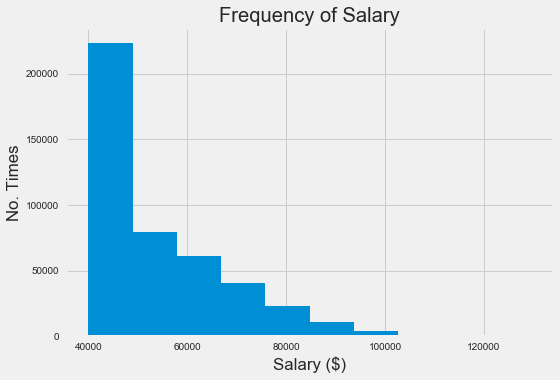

In [21]:
x = hw.salary
plt.hist(x, bins = 10)
plt.title('Frequency of Salary')
plt.xlabel('Salary ($)')
plt.ylabel('No. Times')
plt.tight_layout()
plt.savefig('Salary_Histogram')
plt.show()

In [13]:
salary_title = hw.groupby('title')['salary'].mean().round(2)

df = pd.DataFrame(salary_title)
df.reset_index(inplace = True)
df = df.rename(columns = {'title':'Title','salary':'Salary'})

df


,Title,Salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


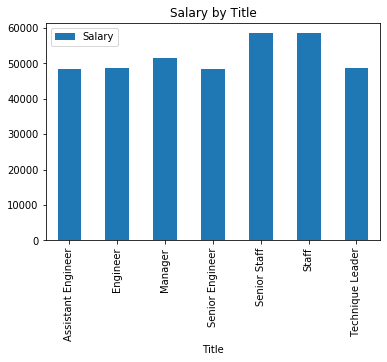

In [15]:
df.plot(kind = 'bar',x = 'Title',y='Salary', title = 'Salary by Title');

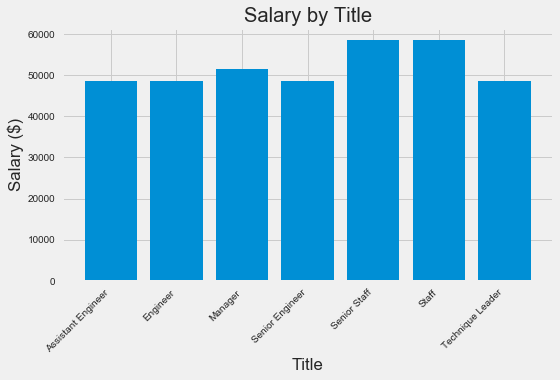

In [22]:
val = df.Salary
plt.style.use('fivethirtyeight')
x = df['Title']
x_pos = [i for i in range(0,x.count())]
plt.bar(x_pos, val)
plt.xticks(x_pos, x, rotation = 45, ha = 'right')
plt.ylabel('Salary ($)')
plt.xlabel('Title')
plt.title('Salary by Title')
plt.tight_layout()
plt.savefig('Salary_by_title.png')
plt.show()

In [103]:
hw[hw['emp_no']==499942]

,emp_no,first_name,last_name,salary,title
443224,499942,April,Foolsday,40000,Technique Leader
